In [1]:
import os
from pathlib import Path
import pathlib
from pandas.core.frame import DataFrame
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import librosa
import librosa.display
import IPython.display as ipd

In [17]:
files_path = 'D:\\music\\'
file_list = os.listdir(files_path)
print(file_list)

['015B_그녀에게 전화오게 하는 방법.wav', '2NB_눈시울.wav', '2NE1_내가 제일 잘나가.wav', '2NE1_너 아님 안돼 .wav', 'AOA_단발머리 (Short Hair).wav', 'Black Pearl (블랙펄)_결국... 너잖아.wav', 'Bobo_가을비 우산속.wav', 'Brown Eyed Girls_내가웃고있어요(가인).wav', 'Buzz_가시.wav', 'DJ DOC_나의 성공담.wav', 'Fly To The Sky_너를 너를 너를.wav', 'Girl`s Day_기대해.wav', 'H-유진_날 사랑하지 마요 (Feat. J).wav', 'HI SUHYUN _나는 달라 (Feat. BOBBY).wav', 'humming urban stereo_님.wav', 'Hun_고맙습니다.wav', 'JK 김동욱_다신 없겠죠.wav', 'M to M_내가 세상에 없을 때.wav', 'M.C. The Max_나를 보낸다 .wav', 'MC몽_내 생애 가장 행복한 시간 (Feat. 허각).wav', 'MC몽_내가 그리웠니 (Feat. 진실 Of Mad Soul Child).wav', 'Miss A_다른 남자 말고 너.wav', 'PSY_나팔바지.wav', 'Rainbow_꿈.wav', 'SeeYa_그 놈 목소리.wav', 'SG워너비_가을 사랑.wav', 'SG워너비_그대를 사랑합니다.wav', 'SG워너비_내 마음의 보석상자.wav', 'Sharp_눈물.wav', 'Tei (테이)_같은 베개....wav', 'Tim_고마웠다고...wav', 'WINNER_끼부리지마.wav', 'Yuri_가슴아 제발.wav', 'Zia_가지 말아요.wav', 'Zion.T_꺼내 먹어요.wav', '가비앤제이(gavy nj)_그녀가 울고 있네요.wav', '거미_거울을 보다가 (Feat. Red Roc).wav', '고유비_꼭 기억해.wav', '고유진_너 하나만.wav', '규현 (KyuHyun)_광화문에서 (At Gwanghwamun).wav', 

In [18]:
singer_list = []
song_list = []

for file in file_list:
    file_path = os.path.join(files_path, file)
    # print(file_path)
  
    file_name = Path(file_path).stem
    print(file_name)
  
    singer, song = file_name.split('_')
    # print(singer)
    # print(song)
    # print('--'*15)
  
    singer = singer.strip().replace(' ', '_')
    song = song.strip().replace(' ', '_')
    print(singer)
    print(song)
    print('--'*15)
  
    singer_list.append(singer)
    song_list.append(song)

015B_그녀에게 전화오게 하는 방법
015B
그녀에게_전화오게_하는_방법
------------------------------
2NB_눈시울
2NB
눈시울
------------------------------
2NE1_내가 제일 잘나가
2NE1
내가_제일_잘나가
------------------------------
2NE1_너 아님 안돼 
2NE1
너_아님_안돼
------------------------------
AOA_단발머리 (Short Hair)
AOA
단발머리_(Short_Hair)
------------------------------
Black Pearl (블랙펄)_결국... 너잖아
Black_Pearl_(블랙펄)
결국..._너잖아
------------------------------
Bobo_가을비 우산속
Bobo
가을비_우산속
------------------------------
Brown Eyed Girls_내가웃고있어요(가인)
Brown_Eyed_Girls
내가웃고있어요(가인)
------------------------------
Buzz_가시
Buzz
가시
------------------------------
DJ DOC_나의 성공담
DJ_DOC
나의_성공담
------------------------------
Fly To The Sky_너를 너를 너를
Fly_To_The_Sky
너를_너를_너를
------------------------------
Girl`s Day_기대해
Girl`s_Day
기대해
------------------------------
H-유진_날 사랑하지 마요 (Feat. J)
H-유진
날_사랑하지_마요_(Feat._J)
------------------------------
HI SUHYUN _나는 달라 (Feat. BOBBY)
HI_SUHYUN
나는_달라_(Feat._BOBBY)
------------------------------
humming urban stereo_님
humming_urb

In [19]:
print(len(singer_list))
print(singer_list)

249
['015B', '2NB', '2NE1', '2NE1', 'AOA', 'Black_Pearl_(블랙펄)', 'Bobo', 'Brown_Eyed_Girls', 'Buzz', 'DJ_DOC', 'Fly_To_The_Sky', 'Girl`s_Day', 'H-유진', 'HI_SUHYUN', 'humming_urban_stereo', 'Hun', 'JK_김동욱', 'M_to_M', 'M.C._The_Max', 'MC몽', 'MC몽', 'Miss_A', 'PSY', 'Rainbow', 'SeeYa', 'SG워너비', 'SG워너비', 'SG워너비', 'Sharp', 'Tei_(테이)', 'Tim', 'WINNER', 'Yuri', 'Zia', 'Zion.T', '가비앤제이(gavy_nj)', '거미', '고유비', '고유진', '규현_(KyuHyun)', '그루(Gru)', '김_광석', '김경호', '김광석', '김돈규', '김돈규', '김동률', '김동률', '김동률', '김동률', '김동욱', '김동준', '김민종', '김범수', '김범수', '김상민', '김수철', '김연우', '김연우', '김지연', '김태우', '김현성', '김현정', '김형중', '김혜림', '나무', '나비', '나얼', '나얼', '남규리', '넬(Nell)', '노을', '다비치', '다이나믹_듀오', '더넛츠', '더원(The_One)', '듀크', '드렁큰_타이거', '디셈버(December)', '디셈버', '레디오', '레이디스_코드', '렉시', '리즈', '리즈', '린(LYn)', '린', '마마무', '마야', '먼데이키즈', '미쓰에이', '바비_킴', '박기영', '박완규', '박정현', '박정현', '박정현', '박지윤5집', '박학기', '배치기', '백아연', '백지영', '뱅크(Bank)', '버즈(BUZZ)', '버즈(Buzz)', '버즈', '벅(Buck)', '베이시스', '변진섭', '별(Star)', '별', '보이스_원', '보이스_원', '브라

In [20]:
print(len(song_list))
print(song_list)

249
['그녀에게_전화오게_하는_방법', '눈시울', '내가_제일_잘나가', '너_아님_안돼', '단발머리_(Short_Hair)', '결국..._너잖아', '가을비_우산속', '내가웃고있어요(가인)', '가시', '나의_성공담', '너를_너를_너를', '기대해', '날_사랑하지_마요_(Feat._J)', '나는_달라_(Feat._BOBBY)', '님', '고맙습니다', '다신_없겠죠', '내가_세상에_없을_때', '나를_보낸다', '내_생애_가장_행복한_시간_(Feat._허각)', '내가_그리웠니_(Feat._진실_Of_Mad_Soul_Child)', '다른_남자_말고_너', '나팔바지', '꿈', '그_놈_목소리', '가을_사랑', '그대를_사랑합니다', '내_마음의_보석상자', '눈물', '같은_베개...', '고마웠다고..', '끼부리지마', '가슴아_제발', '가지_말아요', '꺼내_먹어요', '그녀가_울고_있네요', '거울을_보다가_(Feat._Red_Roc)', '꼭_기억해', '너_하나만', '광화문에서_(At_Gwanghwamun)', 'Pasta', '내_사람이여', '금지된_사랑', '거리에서', '나만의_슬픔', '단(但)', '그건_말야', '그게_나야', '다시_사랑한다_말할까', '다시_시작해보자', '내눈물보다', '나_혼자(Alone)', '귀천도애', '가슴에_지는_태양', '니가_날_떠나', '너에게', '내일', '가질_수_없는_너__(화생방실_클레오파트라)', '나와_같다면', '그때_까지만', '꿈을_꾸다_(Main_Ver.)', '고백', '그녀와의_이별', '그랬나봐_(Piano_Ver.)', '날_위한_이별', '그날_이후', '길에서', '같은_시간_속의_너', '귀로', '깊은_밤을_날아서', '기억을_걷는_시간', '늦은_얘기들', '괜찮아_사랑이야', '꿀잼', '그녀가_아파요_(지현우_Ver.)', '내여자', '그대_눈물까지도', '남자기_때문에', '눈부신_눈물', '네게_줄_수_있는건_오직_사랑뿐',

In [21]:
y, sr = librosa.core.load(files_path + file_list[0])
print(y)
print(sr)
print(y.shape)

[0. 0. 0. ... 0. 0. 0.]
22050
(5382699,)


C:\Users\020\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\020\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\020\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[[-576.52185 -576.52185 -576.52185 ... -576.52185 -576.52185 -576.52185]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 ...
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]]
(20, 10514)
[[-576.52185    0.         0.      ...    0.         0.         0.     ]
 [-576.52185    0.         0.      ...    0.         0.         0.     ]
 [-576.52185    0.         0.      ...    0.         0.         0.     ]
 ...
 [-576.52185    0.         0.      ...    0.         0.         0.     ]
 [-576.52185    0.         0.      ...    0.         0.         0.     ]
 [-576.52185    0.         0.      ...    0.         0.         0.     ]]


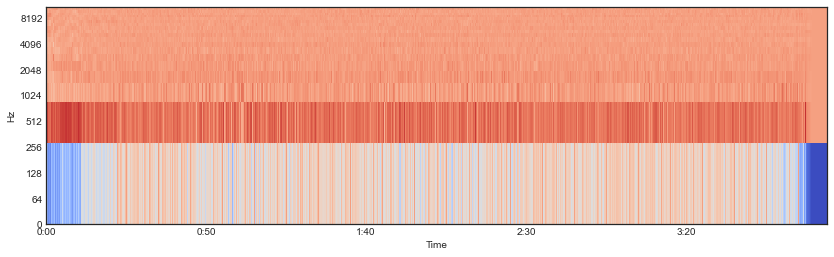

In [22]:
mfccs = librosa.feature.mfcc(y)
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfccs, sr=sr, hop_length=512, x_axis='time', y_axis='log')

print(mfccs)
print(mfccs.shape)
print(mfccs.T)

In [23]:
print(mfccs.shape[0])
print(mfccs.shape[1])
print(mfccs.T.shape[0])
print(mfccs.T.shape[1])

20
10514
10514
20


In [24]:
df = pd.DataFrame(mfccs.T)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-576.521851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-576.521851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-576.521851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-576.521851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-576.521851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,-576.521851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10510,-576.521851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10511,-576.521851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10512,-576.521851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
print(df.shape)
print(df.T.shape)

(10514, 20)
(20, 10514)


In [26]:
arr = np.array(df)
print(arr)
print(arr.shape)

[[-576.52185    0.         0.      ...    0.         0.         0.     ]
 [-576.52185    0.         0.      ...    0.         0.         0.     ]
 [-576.52185    0.         0.      ...    0.         0.         0.     ]
 ...
 [-576.52185    0.         0.      ...    0.         0.         0.     ]
 [-576.52185    0.         0.      ...    0.         0.         0.     ]
 [-576.52185    0.         0.      ...    0.         0.         0.     ]]
(10514, 20)


In [28]:
import pymysql
from sqlalchemy import create_engine
pymysql.install_as_MySQLdb()
import MySQLdb

from sshtunnel import SSHTunnelForwarder
from sqlalchemy import create_engine
import pandas as pd

In [29]:
server = SSHTunnelForwarder(
    ('54.180.126.129',22),
    ssh_username="ubuntu",
    ssh_password="1234",
    remote_bind_address=('127.0.0.1',3306)
    )

In [ ]:
server.start()

In [ ]:
local_port = str(server.local_bind_port)
local_port

In [ ]:
server

In [ ]:
con = pymysql.connect(host = "127.0.0.1", port=server.local_bind_port, user='bigdata', passwd='123a',
                      db='mfcc', charset='utf8', autocommit=True)

In [ ]:
cur = con.cursor()

cols = ['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6',
        'DATA7', 'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12', 'DATA13', 
        'DATA14', 'DATA15', 'DATA16', 'DATA17', 'DATA18', 'DATA19']

for i in range(0, len(file_list)):
  
    title = file_list[i].split('.')[0]
    y, sr = librosa.core.load(files_path + file_list[i])
    mfccs = librosa.feature.mfcc(y)
    print(mfccs.shape)

    df = pd.DataFrame(mfccs.T, columns=cols)
    print(df.columns)
    sql_1 = "CREATE TABLE `{}` (`NUMBER` FLOAT NULL DEFAULT NULL) COLLATE='utf8_unicode_ci';".format(title)
    cur.execute(sql_1)
    print("{} 테이블이 생성되었습니다.".format(title))

    for j in range(0, mfccs.shape[0]):
    sql_2 = "ALTER TABLE `{}` ADD `DATA{}` FLOAT NULL DEFAULT NULL;".format(title, j)
    cur.execute(sql_2)
    print("DATA{} 컬럼이 생성되었습니다.".format(j))

    sql_3 = "ALTER TABLE `{}` DROP `NUMBER`;".format(title)
    cur.execute(sql_3)
    print("NUMBER 컬럼이 삭제되었습니다.")

    for n in range(len(df)):
    sql_4 = "INSERT INTO `{}` VALUES ('{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}');".format(title ,df['DATA0'][n], df['DATA1'][n], df['DATA2'][n], df['DATA3'][n],
                                                                                                                                                                    df['DATA4'][n], df['DATA5'][n], df['DATA6'][n], df['DATA7'][n],
                                                                                                                                                                    df['DATA8'][n], df['DATA9'][n], df['DATA10'][n], df['DATA11'][n],
                                                                                                                                                                    df['DATA12'][n], df['DATA13'][n], df['DATA14'][n], df['DATA15'][n],
                                                                                                                                                                    df['DATA16'][n], df['DATA17'][n], df['DATA18'][n], df['DATA19'][n])
    cur.execute(sql_4)
    print("데이터가 정상적으로 입력되었습니다.{},{}".format(title, n))
    
cur.close()
con.close()

In [30]:
# %%

server.stop()

In [ ]:
# #%%

# """ 여기까지 """

In [ ]:
# # %%

# import pandas as pd
# import pymysql
# from datetime import datetime

# #%%

# def query_MariaDB(query):
#   # DB Connection
#   con = pymysql.connect(host = "127.0.0.1", port=server.local_bind_port, user='bigdata', passwd='123a',
#                       db='mfcc', charset='utf8', autocommit=True)

#   # start time
#   start_tm = datetime.now()

#   # Get a DataFrame
#   global query_result
#   query_result = pd.read_sql(query, con)

#   # Close connection
#   end_tm = datetime.now()

#   print('START TIME : ', str(start_tm))
#   print('END TIME : ', str(end_tm))
#   print('ELAP time :', str(end_tm - start_tm))
#   con.close()

#   return query_result

# # %%

# mfccs1 = query_MariaDB("SELECT * FROM `AOA_심쿵해 (Heart Attack)`;")
# mfccs1

# # %%

# arr = np.array(mfccs1.T)
# arr

# # %%

# plt.figure(figsize=(14, 6))
# librosa.display.specshow(arr, sr=sr, x_axis='time')
# plt.show()

# # %%

# np.array(mfccs1.T)

# # %%

# np.array(mfccs1.T).shape